In [2]:
import os
import gc
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import MultipleLocator


from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.preprocessing import KBinsDiscretizer,Binarizer
from sklearn.impute import SimpleImputer



In [194]:
train_df = pd.read_csv("../train.csv")
test_df = pd.read_csv("../testA.csv")

In [195]:
#定类特征
category_feature_list = ['verificationStatus','issueDate','purpose','postCode','regionCode',
                 'initialListStatus','applicationType','earliesCreditLine','title','policyCode']
#定序特征
order_feature_list = ['term','grade','subGrade','employmentLength','homeOwnership']

#定量特征
numerical_feature_list = ['id', 'loanAmnt', 'interestRate', 'installment', 'employmentTitle',
 'annualIncome', 'isDefault', 'dti', 'delinquency_2years', 'ficoRangeLow', 'ficoRangeHigh',
 'openAcc', 'pubRec', 'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc', 'n0',
 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11', 'n12', 'n13', 'n14']

# 0. object特征处理和缺失值处理

In [196]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 47 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  800000 non-null  int64  
 1   loanAmnt            800000 non-null  float64
 2   term                800000 non-null  int64  
 3   interestRate        800000 non-null  float64
 4   installment         800000 non-null  float64
 5   grade               800000 non-null  object 
 6   subGrade            800000 non-null  object 
 7   employmentTitle     799999 non-null  float64
 8   employmentLength    753201 non-null  object 
 9   homeOwnership       800000 non-null  int64  
 10  annualIncome        800000 non-null  float64
 11  verificationStatus  800000 non-null  int64  
 12  issueDate           800000 non-null  object 
 13  isDefault           800000 non-null  int64  
 14  purpose             800000 non-null  int64  
 15  postCode            799999 non-nul

## 0.1 grade  处理object特征grade,将其进行标签编码

In [197]:
grade_enc = LabelEncoder()
train_df['grade'] = grade_enc.fit_transform(train_df['grade'])
test_df['grade'] = grade_enc.transform(test_df['grade'])

In [198]:
test_df['grade'].isnull().sum()

0

## 0.2 subGrade 处理object特征subGrade

In [199]:
grade_enc = LabelEncoder()
train_df['subGrade'] = grade_enc.fit_transform(train_df['subGrade'])
test_df['subGrade'] = grade_enc.transform(test_df['subGrade'])

## 0.3 employmentLength 处理object employmentLength

In [200]:
imputer = SimpleImputer(strategy='most_frequent')
train_df['employmentLength'] = imputer.fit_transform(train_df[['employmentLength']])
test_df['employmentLength'] = imputer.transform(test_df[['employmentLength']])

In [201]:
employmentLength_enc = LabelEncoder()
train_df['employmentLength'] = employmentLength_enc.fit_transform(train_df['employmentLength'])
test_df['employmentLength'] = employmentLength_enc.transform(test_df['employmentLength'])

## 0.4 issueDate 处理日期特征 issueDate

In [202]:
train_df['issueDate_year'] = pd.DatetimeIndex(train_df['issueDate']).year
test_df['issueDate_year'] = pd.DatetimeIndex(test_df['issueDate']).year

In [203]:
train_df['issueDate_month'] = pd.DatetimeIndex(train_df['issueDate']).month
test_df['issueDate_month'] = pd.DatetimeIndex(test_df['issueDate']).month

## 0.5 earliesCreditLine 处理日期特征earliesCreditLine

In [204]:
train_df['earliesCreditLine_year'] = pd.DatetimeIndex(train_df['earliesCreditLine']).year
train_df['earliesCreditLine_month'] = pd.DatetimeIndex(train_df['earliesCreditLine']).month

In [205]:
test_df['earliesCreditLine_year'] = pd.DatetimeIndex(test_df['earliesCreditLine']).year
test_df['earliesCreditLine_month'] = pd.DatetimeIndex(test_df['earliesCreditLine']).month

In [206]:
def PlotNumFeautre(col):
    fig,ax = plt.subplots(figsize = (15, 6))
    sns.histplot(data = train_df, x = col,hue = 'isDefault', ax = ax)
    print("max:{}, min:{}".format(max(train_df[col]), min(train_df[col])))

# 1. numerical feature binning

## 1.1 loanAmnt ——bining

max:40000.0, min:500.0


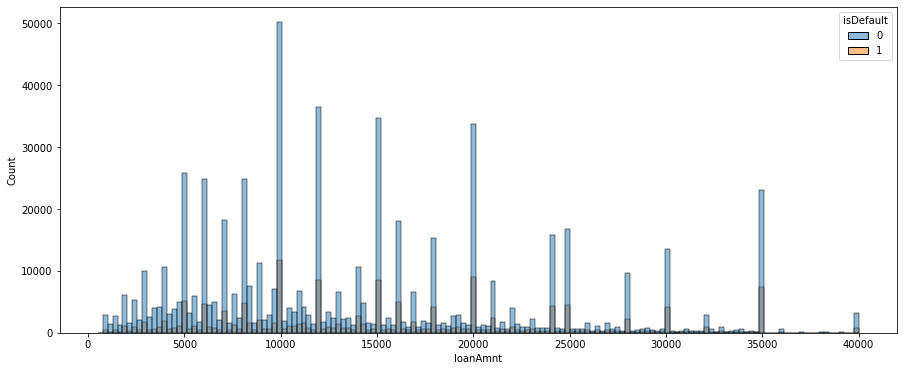

In [207]:
PlotNumFeautre('loanAmnt')

In [208]:
#根据图示可以将 loanAmnt做8个分箱处理
loanAmnt_bin_enc = KBinsDiscretizer(n_bins=8,encode='ordinal',strategy='uniform')

In [209]:
train_df['loanAmnt'] = loanAmnt_bin_enc.fit_transform(train_df[['loanAmnt']])
test_df['loanAmnt'] = loanAmnt_bin_enc.transform(test_df[['loanAmnt']])

## 1.2 interestRate——binning

max:30.99, min:5.31


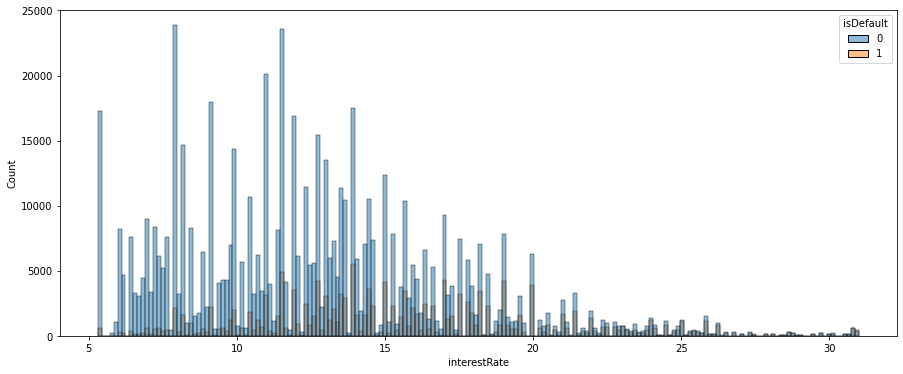

In [210]:
PlotNumFeautre('interestRate')

In [211]:
interestRate_bin_enc = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
train_df['interestRate'] = interestRate_bin_enc.fit_transform(train_df[['interestRate']])
test_df['interestRate'] = interestRate_bin_enc.transform(test_df[['interestRate']])

## 1.2 installment——binning

max:1715.42, min:15.69


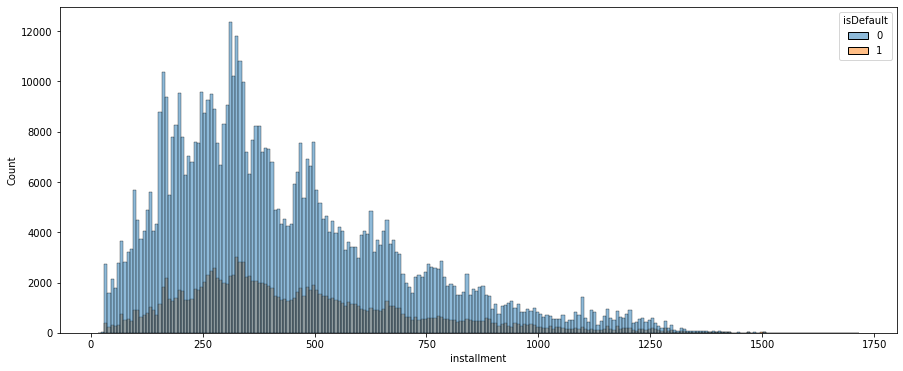

In [212]:
PlotNumFeautre('installment')

In [213]:
installment_bin_enc = KBinsDiscretizer(n_bins=6, encode= 'ordinal', strategy='uniform')
train_df['installment'] = installment_bin_enc.fit_transform(train_df[['installment']])
test_df['installment'] = installment_bin_enc.transform(test_df[['installment']])

## 1.3 employmentTitle——binning

max:378351.0, min:0.0


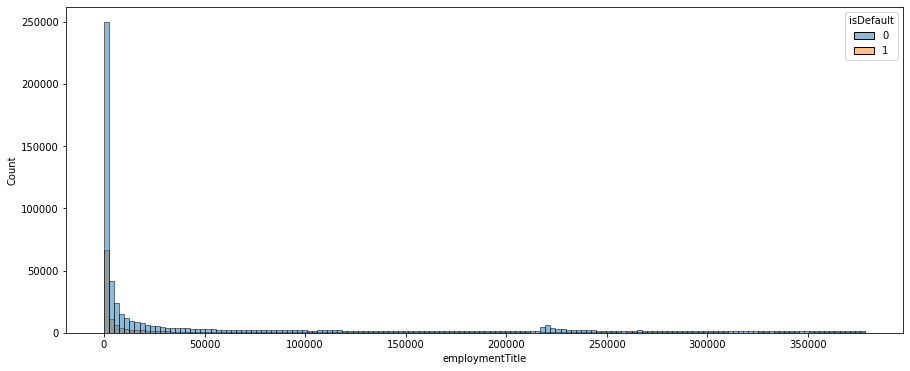

In [214]:
PlotNumFeautre('employmentTitle')

In [215]:
employmentTitle_imputer = SimpleImputer()
train_df['employmentTitle'] = employmentTitle_imputer.fit_transform(train_df[['employmentTitle']])
test_df['employmentTitle'] = employmentTitle_imputer.transform(test_df[['employmentTitle']])

employmentTitle_bin_enc = KBinsDiscretizer(n_bins=2, encode='ordinal', strategy='uniform')
train_df['employmentTitle'] = employmentTitle_bin_enc.fit_transform(train_df[['employmentTitle']])
test_df['employmentTitle'] = employmentTitle_bin_enc.fit_transform(test_df[['employmentTitle']])

## 1.4 annualIncome------binning

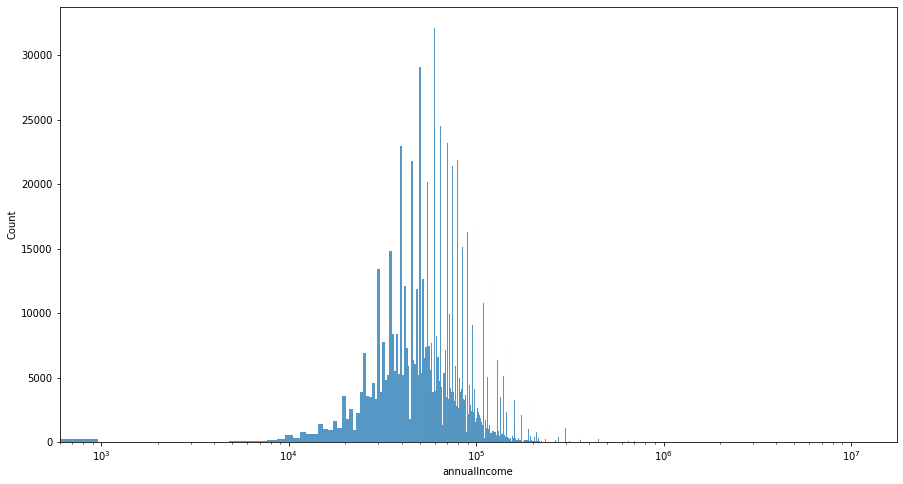

In [216]:
fig, ax = plt.subplots(figsize = (15, 8))
sns.histplot(data = train_df, x = 'annualIncome',ax = ax)
ax.set_xscale('log')

In [217]:
train_df['annualIncome'].value_counts().sort_values()

54829.0         1
57304.0         1
325879.0        1
97532.0         1
36130.0         1
            ...  
40000.0     21057
70000.0     22076
65000.0     23126
50000.0     27062
60000.0     30682
Name: annualIncome, Length: 44926, dtype: int64

In [218]:
'''由于annualIncome特征的取值跨度较大，设定范围进行编码转化'''
def annualIncomeTransform(value):
    if value < 10000:
        return 0
    elif value < 200000:
        return 1
    else:
        return 2
train_df['annualIncome'] = train_df['annualIncome'].apply(annualIncomeTransform)
test_df['annualIncome'] = test_df['annualIncome'].apply(annualIncomeTransform)

## 1.5 dti—binning

In [219]:
train_df['dti'].value_counts().sort_index()

-1.00        2
 0.00      516
 0.01        6
 0.02       10
 0.03       10
          ... 
 797.10      1
 818.10      1
 831.97      1
 991.57      1
 999.00     24
Name: dti, Length: 6321, dtype: int64

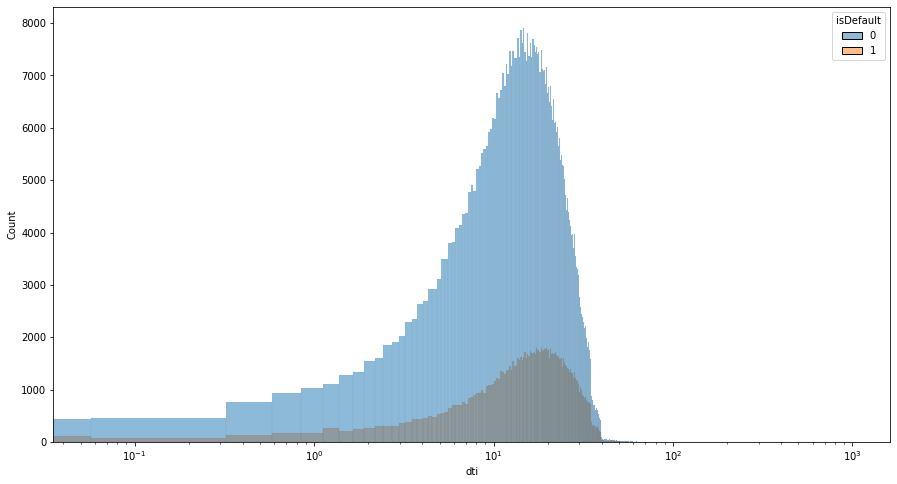

In [220]:
fig, ax = plt.subplots(figsize = (15, 8))
sns.histplot(data = train_df,x = 'dti', hue = 'isDefault', ax = ax)
ax.set_xscale('log')

In [221]:
def dtiTransform(value):
    if value < 0.3:
        return 0
    elif value < 13:
        return 1
    else:
        return 2
train_df['dti'] = train_df['dti'].apply(dtiTransform)
test_df['dti'] = test_df['dti'].apply(dtiTransform)

## 1.6 delinquency_2years—binning

In [222]:
train_df['delinquency_2years'].value_counts()

0.0     645715
1.0     102586
2.0      29944
3.0      10919
4.0       4808
5.0       2504
6.0       1399
7.0        770
8.0        443
9.0        293
10.0       192
11.0       144
12.0        86
14.0        53
13.0        50
15.0        23
16.0        20
18.0        13
19.0        10
20.0         7
17.0         6
22.0         3
21.0         3
29.0         2
26.0         2
25.0         1
27.0         1
39.0         1
30.0         1
24.0         1
Name: delinquency_2years, dtype: int64

max:39.0, min:0.0


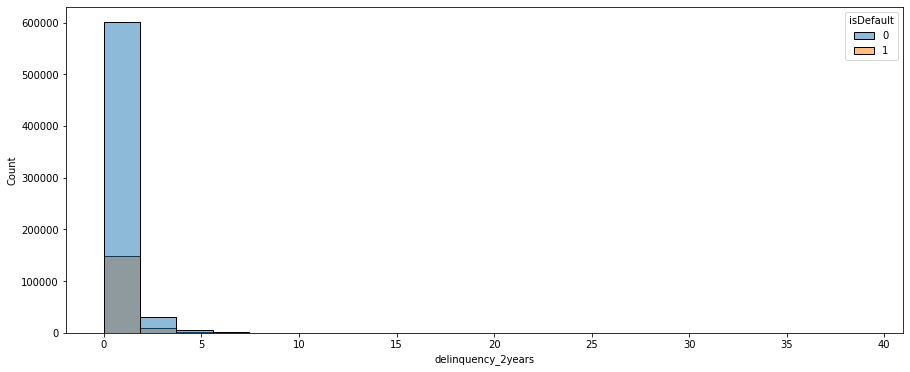

In [223]:
PlotNumFeautre('delinquency_2years')

In [224]:
def delinquency_2yearsTransform(value):
    if value > 6:
        return 7
    else:
        return value
train_df['delinquency_2years'] = train_df['delinquency_2years'].apply(
    delinquency_2yearsTransform)
test_df['delinquency_2years'] = test_df['delinquency_2years'].apply(
    delinquency_2yearsTransform)

## 1.7 ficoRangeLow——binning

In [225]:
train_df['ficoRangeLow'].value_counts()

660.0    71974
670.0    69815
665.0    69619
675.0    61993
680.0    61294
685.0    53668
690.0    52046
695.0    47065
700.0    43292
705.0    39030
710.0    34296
715.0    30154
720.0    26036
725.0    20766
730.0    18186
735.0    14377
740.0    12585
745.0    10336
750.0     9419
755.0     8191
760.0     6716
765.0     6163
770.0     5311
775.0     4882
780.0     4286
785.0     3476
790.0     3284
795.0     2637
800.0     2261
805.0     1942
810.0     1408
815.0     1111
820.0      827
825.0      636
830.0      412
835.0      249
840.0      140
845.0      116
630.0        1
Name: ficoRangeLow, dtype: int64

max:845.0, min:630.0


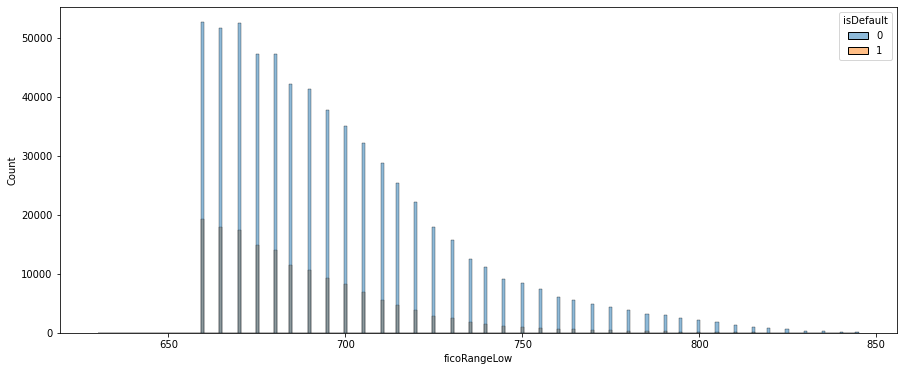

In [226]:
PlotNumFeautre('ficoRangeLow')

In [227]:
train_df['ficoRangeLow'] = train_df['ficoRangeLow'].apply(lambda x: 660 if x < 660 else x)
test_df['ficoRangeLow'] = test_df['ficoRangeLow'].apply(lambda x: 660 if x < 660 else x)

## 1.8 ficoRangeHigh —binning

In [228]:
train_df['ficoRangeHigh'].value_counts()

664.0    71974
674.0    69815
669.0    69619
679.0    61993
684.0    61294
689.0    53668
694.0    52046
699.0    47065
704.0    43292
709.0    39030
714.0    34296
719.0    30154
724.0    26036
729.0    20766
734.0    18186
739.0    14377
744.0    12585
749.0    10336
754.0     9419
759.0     8191
764.0     6716
769.0     6163
774.0     5311
779.0     4882
784.0     4286
789.0     3476
794.0     3284
799.0     2637
804.0     2261
809.0     1942
814.0     1408
819.0     1111
824.0      827
829.0      636
834.0      412
839.0      249
844.0      140
850.0      116
634.0        1
Name: ficoRangeHigh, dtype: int64

max:850.0, min:634.0


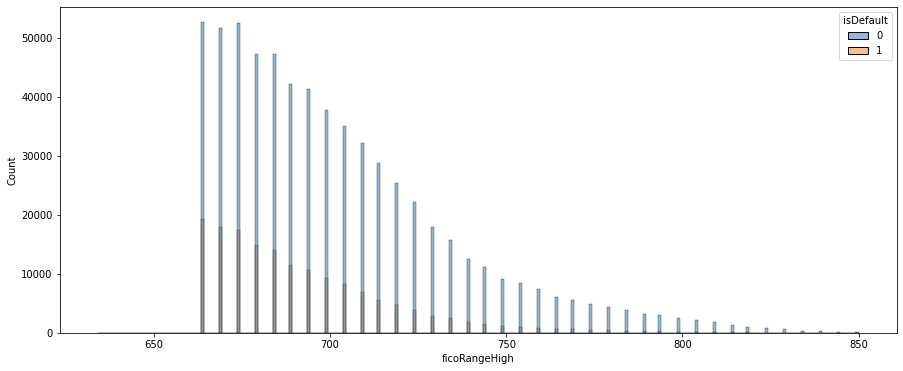

In [229]:
PlotNumFeautre('ficoRangeHigh')

In [230]:
train_df['ficoRangeHigh'] = train_df['ficoRangeHigh'].apply(lambda x: 664 if x < 664 else x)
test_df['ficoRangeHigh'] = test_df['ficoRangeHigh'].apply(lambda x: 664 if x < 664 else x)

## 1.9 openAcc——binning

In [231]:
train_df['openAcc'].value_counts()

9.0     70865
10.0    69171
8.0     68201
11.0    64069
7.0     61355
        ...  
82.0        1
81.0        1
86.0        1
74.0        1
67.0        1
Name: openAcc, Length: 75, dtype: int64

max:86.0, min:0.0


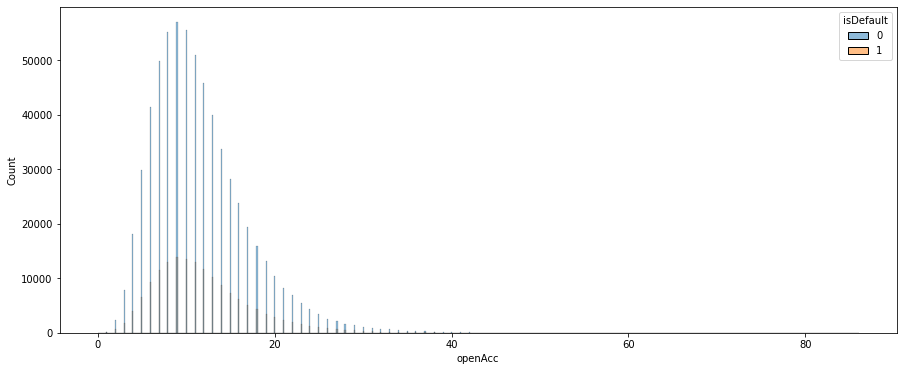

In [232]:
PlotNumFeautre('openAcc')

## 1.10 pubRec—binning

In [233]:
train_df['pubRec'].value_counts()

0.0     664765
1.0     113186
2.0      14520
3.0       4432
4.0       1535
5.0        757
6.0        367
7.0        165
8.0        105
9.0         51
10.0        37
11.0        23
12.0        14
15.0         7
13.0         6
16.0         4
18.0         4
22.0         2
24.0         2
19.0         2
21.0         2
20.0         2
14.0         2
49.0         2
63.0         1
46.0         1
28.0         1
86.0         1
54.0         1
40.0         1
47.0         1
17.0         1
Name: pubRec, dtype: int64

max:86.0, min:0.0


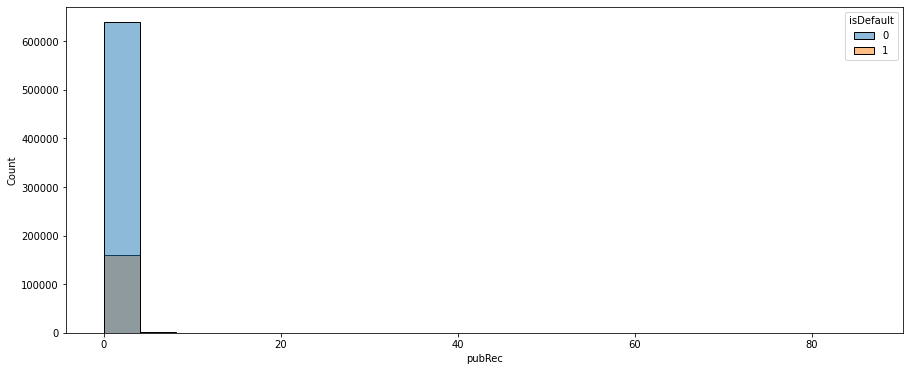

In [234]:
PlotNumFeautre('pubRec')

In [235]:
train_df['pubRec'] = train_df['pubRec'].apply(lambda x: x if x <= 1 else 2)
test_df['pubRec'] = test_df['pubRec'].apply(lambda x: x if x <= 1 else 2)

## 1.11 pubRecBankruptcies——binning

In [236]:
train_df['pubRecBankruptcies'].value_counts()

0.0     700076
1.0      93639
2.0       4566
3.0        945
4.0        248
5.0         80
6.0         23
7.0         11
9.0          3
8.0          3
12.0         1
Name: pubRecBankruptcies, dtype: int64

In [237]:
train_df['pubRecBankruptcies'] = train_df['pubRecBankruptcies'].apply(lambda x: x if x <= 2 else 3)
test_df['pubRecBankruptcies'] = test_df['pubRecBankruptcies'].apply(lambda x: x if x <= 2 else 3)

## 1.12 revolBal —binning

In [238]:
train_df['revolUtil'].value_counts()

0.00      4170
55.00     1589
61.00     1579
57.00     1575
53.00     1575
          ... 
120.90       1
107.90       1
49.69        1
0.75         1
136.40       1
Name: revolUtil, Length: 1286, dtype: int64

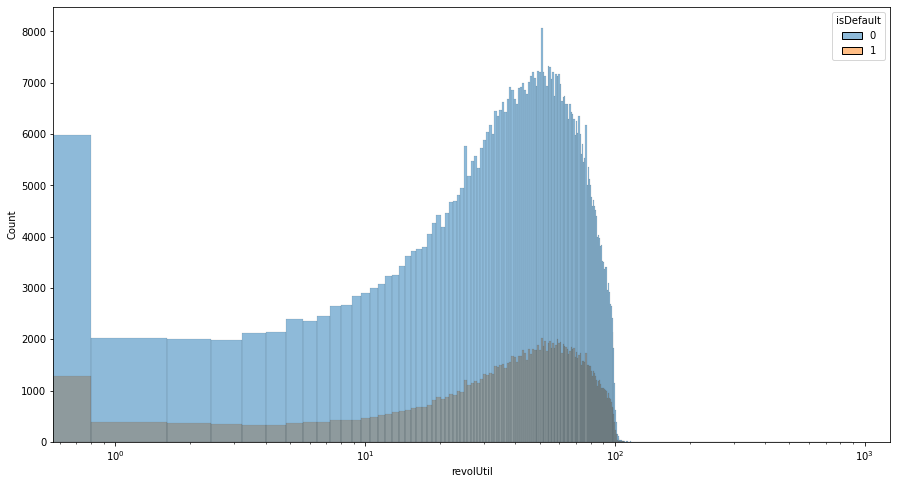

In [239]:
fig, ax = plt.subplots(figsize = (15, 8))
sns.histplot(data = train_df, x = 'revolUtil',hue = 'isDefault', ax = ax)
ax.set_xscale('log')

In [240]:
def revolUtilTransform(value):
    if value <= 10:
        return 0
    elif value <= 100:
        return 1
    else:
        return 2
train_df['revolUtil'] = train_df['revolUtil'].apply(revolUtilTransform)
test_df['revolUtil'] = test_df['revolUtil'].apply(revolUtilTransform)

## 1.13 totalAcc—binning

In [241]:
train_df['totalAcc'].value_counts()

20.0     28956
21.0     28820
19.0     28697
22.0     28671
18.0     28188
         ...  
151.0        1
146.0        1
103.0        1
141.0        1
129.0        1
Name: totalAcc, Length: 134, dtype: int64

max:162.0, min:2.0


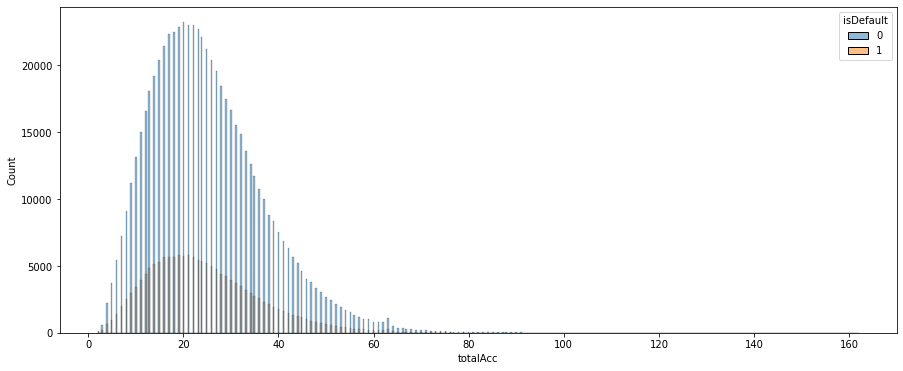

In [242]:
PlotNumFeautre('totalAcc')

In [243]:
train_df['revolUtil'] = train_df['revolUtil'].apply(revolUtilTransform)
test_df['revolUtil'] = test_df['revolUtil'].apply(revolUtilTransform)

## 1.14 n0——binning

In [244]:
train_df['n0'].value_counts()

0.0     579427
1.0      96105
2.0      38793
3.0      17657
4.0      10521
5.0       6132
6.0       3893
7.0       2472
8.0       1567
9.0       1002
10.0       676
11.0       423
12.0       331
13.0       185
14.0       166
15.0        84
16.0        76
17.0        45
18.0        34
19.0        23
20.0        18
23.0        15
22.0        15
21.0        13
24.0        12
26.0        10
25.0         9
29.0         5
31.0         4
27.0         3
28.0         3
34.0         2
33.0         2
30.0         2
51.0         1
35.0         1
38.0         1
39.0         1
32.0         1
Name: n0, dtype: int64

In [245]:
train_df['n0'] = train_df['n0'].apply(lambda x: x if x < 10 else 11)
test_df['n0'] = test_df['n0'].apply(lambda x: x if x < 10 else 11)

## 1.15 n1——binning

In [246]:
train_df['n1'].value_counts()

3.0     163008
2.0     154693
4.0     126573
1.0      87122
5.0      84396
6.0      52103
7.0      30905
8.0      18148
0.0      16266
9.0      10688
10.0      6328
11.0      3766
12.0      2265
13.0      1366
14.0       732
15.0       494
16.0       295
17.0       222
18.0       128
19.0        83
20.0        36
21.0        30
22.0        25
23.0        17
24.0        12
26.0         9
25.0         6
30.0         5
27.0         3
28.0         2
33.0         2
32.0         1
29.0         1
Name: n1, dtype: int64

In [247]:
train_df['n1'] = train_df['n1'].apply(lambda x : x if x < 14 else 14)
test_df['n1'] = test_df['n1'].apply(lambda x : x if x < 14 else 14)

## 1.16 n2——binning

In [248]:
train_df['n2'].value_counts()

4.0     117211
5.0     108116
3.0     106623
6.0      88160
2.0      70566
7.0      68102
8.0      50430
9.0      35775
1.0      26544
10.0     25155
11.0     17424
12.0     12317
13.0      8579
14.0      6132
15.0      4392
0.0       3271
16.0      3058
17.0      2237
18.0      1479
19.0      1179
20.0       814
21.0       545
22.0       414
23.0       303
24.0       216
25.0       168
26.0       129
27.0        90
28.0        64
29.0        54
30.0        39
31.0        27
32.0        24
34.0        17
33.0        16
36.0        13
35.0        10
38.0         7
37.0         6
39.0         5
43.0         4
42.0         4
44.0         2
40.0         2
41.0         2
63.0         1
52.0         1
46.0         1
57.0         1
60.0         1
Name: n2, dtype: int64

In [249]:
def n2Transform(value):
    if value < 20 :
        return value
    else:
        return 20
train_df['n2'] = train_df['n2'].apply(n2Transform)
test_df['n2'] = test_df['n2'].apply(n2Transform)

## 1.17 n3——binning

In [250]:
train_df['n3'].value_counts()

4.0     117211
5.0     108116
3.0     106623
6.0      88160
2.0      70566
7.0      68102
8.0      50430
9.0      35775
1.0      26544
10.0     25155
11.0     17424
12.0     12317
13.0      8579
14.0      6132
15.0      4392
0.0       3271
16.0      3058
17.0      2237
18.0      1479
19.0      1179
20.0       814
21.0       545
22.0       414
23.0       303
24.0       216
25.0       168
26.0       129
27.0        90
28.0        64
29.0        54
30.0        39
31.0        27
32.0        24
34.0        17
33.0        16
36.0        13
35.0        10
38.0         7
37.0         6
39.0         5
43.0         4
42.0         4
44.0         2
40.0         2
41.0         2
63.0         1
52.0         1
46.0         1
57.0         1
60.0         1
Name: n3, dtype: int64

In [251]:
def n3Transform(value):
    if value < 20 :
        return value
    else:
        return 20
train_df['n3'] = train_df['n3'].apply(n3Transform)
test_df['n3'] = test_df['n3'].apply(n3Transform)

## 1.18 n4——binning

In [252]:
train_df['n4'].value_counts()

3.0     134529
4.0     128078
2.0     105568
5.0     103239
6.0      75699
7.0      52687
1.0      49656
8.0      35717
9.0      23893
10.0     15962
11.0     10682
0.0       7785
12.0      7122
13.0      4804
14.0      3253
15.0      2374
16.0      1527
17.0      1114
18.0       839
19.0       553
20.0       407
21.0       286
22.0       238
23.0       157
24.0       145
25.0       114
26.0        65
27.0        59
28.0        40
29.0        33
30.0        29
31.0        22
32.0        17
33.0        14
35.0        11
36.0        10
37.0         6
40.0         5
38.0         5
34.0         5
39.0         4
41.0         2
46.0         2
42.0         2
49.0         1
43.0         1
Name: n4, dtype: int64

In [253]:
train_df['n4'] = train_df['n4'].apply(lambda x: x if x < 18 else 18)
test_df['n4'] = test_df['n4'].apply(lambda x: x if x < 18 else 18)

## 1.19 n5

In [254]:
train_df['n5'].value_counts()

5.0     76576
6.0     75679
4.0     71175
7.0     71021
8.0     64347
        ...  
57.0        1
64.0        1
66.0        1
63.0        1
68.0        1
Name: n5, Length: 65, dtype: int64

max:70.0, min:0.0


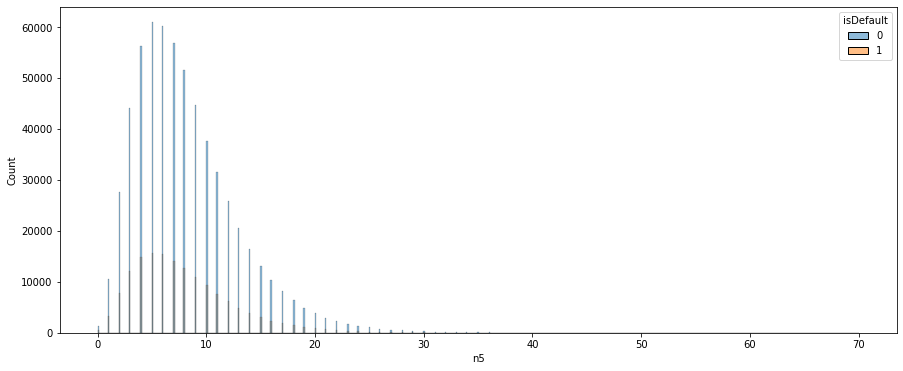

In [255]:
PlotNumFeautre('n5')

In [256]:
train_df['n5'] = train_df['n5'].apply(lambda x: x if x <30 else 30)
test_df['n5'] = test_df['n5'].apply(lambda x: x if x <30 else 30)

## 1.20 n6

In [257]:
train_df['n6'].value_counts()

4.0      64692
3.0      64139
5.0      61863
2.0      58022
6.0      57240
         ...  
94.0         1
100.0        1
98.0         1
113.0        1
104.0        1
Name: n6, Length: 107, dtype: int64

max:132.0, min:0.0


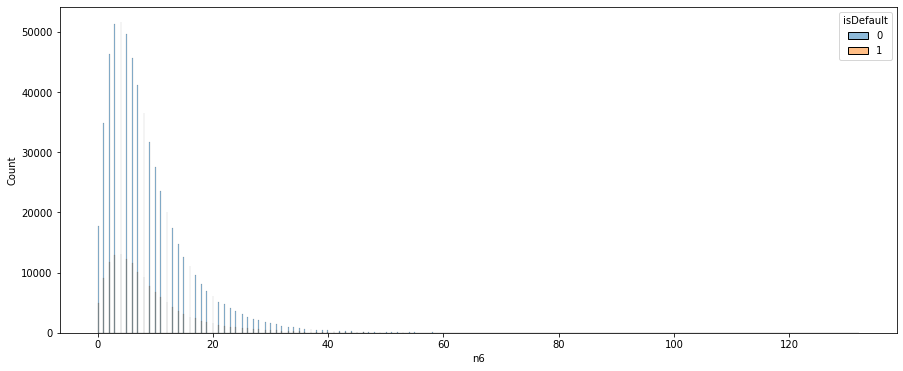

In [258]:
PlotNumFeautre('n6')

In [259]:
train_df['n6'] = train_df['n6'].apply(lambda x: x  if x < 40 else 40)
test_df['n6'] = test_df['n6'].apply(lambda x: x  if x < 40 else 40)

## 1.21 n7

In [260]:
train_df['n7'].value_counts()

6.0     83331
5.0     80569
7.0     79026
8.0     71219
4.0     68256
        ...  
77.0        1
73.0        1
59.0        1
63.0        1
53.0        1
Name: n7, Length: 70, dtype: int64

max:79.0, min:0.0


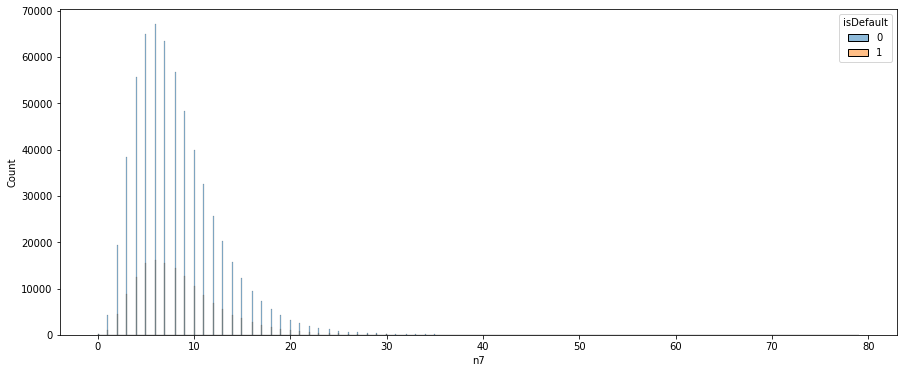

In [261]:
PlotNumFeautre('n7')

In [262]:
train_df['n7'] = train_df['n7'].apply(lambda x: x if x < 30 else 30)
test_df['n7'] = test_df['n7'].apply(lambda x: x if x < 30 else 30)

## 1.22 n8

In [263]:
train_df['n8'].value_counts()

11.0     44808
10.0     44653
9.0      43882
12.0     43358
8.0      42024
         ...  
128.0        1
107.0        1
87.0         1
78.0         1
83.0         1
Name: n8, Length: 102, dtype: int64

max:128.0, min:1.0


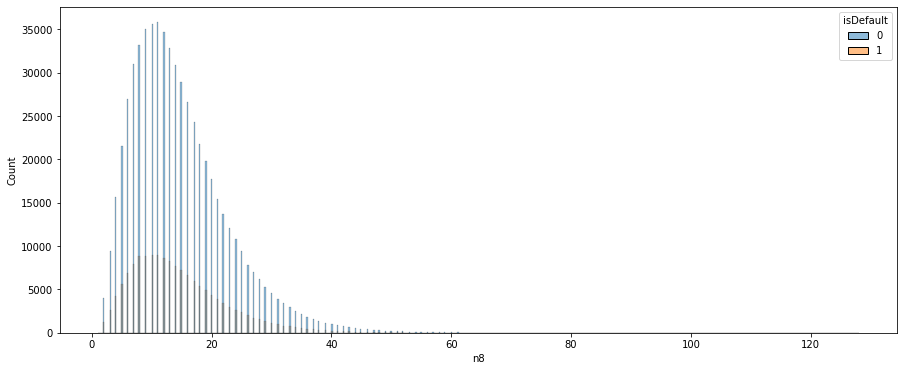

In [264]:
PlotNumFeautre('n8')

In [265]:
train_df['n8'] = train_df['n8'].apply(lambda x: x if x < 50 else 50)
test_df['n8'] = test_df['n8'].apply(lambda x: x if x < 50 else 50)

## 1.23 n9

In [266]:
train_df['n9'].value_counts()

4.0     118134
5.0     108976
3.0     107222
6.0      88847
2.0      70902
7.0      68413
8.0      50342
9.0      35601
1.0      26464
10.0     24868
11.0     17092
12.0     11982
13.0      8207
14.0      5836
15.0      4066
0.0       3228
16.0      2839
17.0      2010
18.0      1286
19.0      1045
20.0       697
21.0       461
22.0       316
23.0       240
24.0       167
25.0       132
26.0        96
27.0        64
28.0        51
29.0        42
30.0        24
32.0        15
31.0        15
34.0        12
33.0        11
35.0         5
36.0         5
39.0         4
43.0         4
38.0         3
37.0         3
44.0         1
45.0         1
42.0         1
Name: n9, dtype: int64

In [267]:
train_df['n9'] = train_df['n9'].apply(lambda x: x if x < 26 else 26)
test_df['n9'] = test_df['n9'].apply(lambda x: x if x < 26 else 26)

## 1.24 n10

In [268]:
train_df['n10'].value_counts()

9.0     68023
10.0    66407
8.0     65287
11.0    61601
7.0     58455
        ...  
80.0        1
64.0        1
75.0        1
74.0        1
67.0        1
Name: n10, Length: 76, dtype: int64

max:82.0, min:0.0


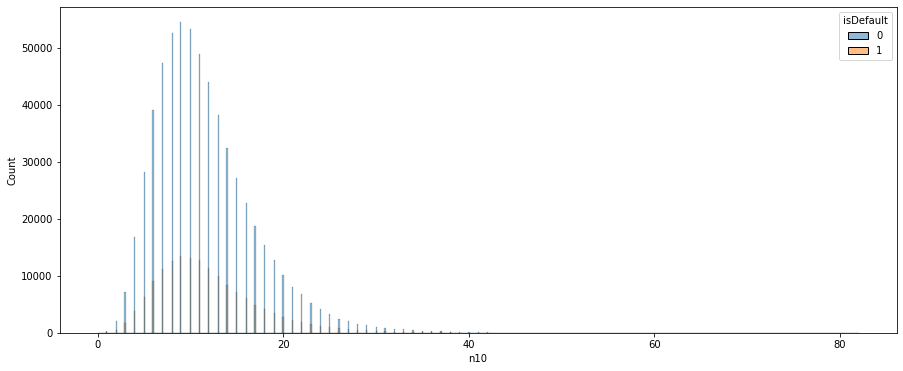

In [269]:
PlotNumFeautre('n10')

In [270]:
train_df['n10'] = train_df['n10'].apply(lambda x: x if x < 35 else 35)
test_df['n10'] = test_df['n10'].apply(lambda x: x if x < 35 else 35)

## 1.25 n11

In [271]:
train_df['n11'].value_counts()

0.0    729682
1.0       540
2.0        24
4.0         1
3.0         1
Name: n11, dtype: int64

In [272]:
train_df['n11'] = train_df['n11'].apply(lambda x: x if x < 2 else 2)
test_df['n11'] = test_df['n11'].apply(lambda x: x if x < 2 else 2)

## 1.26 n12

In [273]:
train_df['n12'].value_counts()

0.0    757315
1.0      2281
2.0       115
3.0        16
4.0         3
Name: n12, dtype: int64

In [274]:
train_df['n12'] = train_df['n12'].apply(lambda x: x if x < 2 else 2)
test_df['n12'] = test_df['n12'].apply(lambda x: x if x < 2 else 2)

## 1.27 n13 

In [275]:
train_df['n13'].value_counts()

0.0     716131
1.0      32506
2.0       6565
3.0       1780
4.0        993
5.0        528
6.0        405
7.0        222
8.0        172
9.0        138
10.0        83
11.0        67
12.0        36
14.0        28
13.0        22
15.0        11
16.0         9
18.0         9
20.0         7
19.0         5
26.0         3
22.0         3
17.0         2
21.0         1
39.0         1
29.0         1
30.0         1
24.0         1
Name: n13, dtype: int64

In [276]:
train_df['n13'] = train_df['n13'].apply(lambda x: x if x < 10 else 10)
test_df['n13'] = test_df['n13'].apply(lambda x: x if x < 10 else 10)

## 1.28 n14

In [277]:
train_df['n14'].value_counts()

1.0     187501
2.0     171704
0.0     128053
3.0     124621
4.0      73869
5.0      36018
6.0      17388
7.0       9460
8.0       4902
9.0       2692
10.0      1423
11.0       835
12.0       489
13.0       278
14.0       194
15.0       101
16.0        74
17.0        43
18.0        17
20.0        17
19.0        16
21.0         8
23.0         7
24.0         5
25.0         4
22.0         4
26.0         3
28.0         1
27.0         1
29.0         1
30.0         1
Name: n14, dtype: int64

In [278]:
train_df['n14'] = train_df['n14'].apply(lambda x: x if x < 11 else 11)
test_df['n14'] = test_df['n14'].apply(lambda x: x if x < 11 else 11)

In [279]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 51 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       800000 non-null  int64  
 1   loanAmnt                 800000 non-null  float64
 2   term                     800000 non-null  int64  
 3   interestRate             800000 non-null  float64
 4   installment              800000 non-null  float64
 5   grade                    800000 non-null  int32  
 6   subGrade                 800000 non-null  int32  
 7   employmentTitle          800000 non-null  float64
 8   employmentLength         800000 non-null  int32  
 9   homeOwnership            800000 non-null  int64  
 10  annualIncome             800000 non-null  int64  
 11  verificationStatus       800000 non-null  int64  
 12  issueDate                800000 non-null  object 
 13  isDefault                800000 non-null  int64  
 14  purp

In [285]:
imputer  = SimpleImputer(strategy='most_frequent')
train_df['title'] = imputer.fit_transform(train_df[['title']])
test_df['title'] = imputer.transform(test_df[['title']])

train_df['postCode'] = imputer.fit_transform(train_df[['postCode']])
test_df['postCode'] = imputer.transform(test_df[['postCode']])




In [287]:
for col in train_df.columns:
    if train_df[col].dtype == 'object':
        train_df.drop(labels = [col], axis = 1, inplace = True)
        test_df.drop(labels = [col], axis = 1, inplace = True)

In [291]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 49 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       800000 non-null  int64  
 1   loanAmnt                 800000 non-null  float64
 2   term                     800000 non-null  int64  
 3   interestRate             800000 non-null  float64
 4   installment              800000 non-null  float64
 5   grade                    800000 non-null  int32  
 6   subGrade                 800000 non-null  int32  
 7   employmentTitle          800000 non-null  float64
 8   employmentLength         800000 non-null  int32  
 9   homeOwnership            800000 non-null  int64  
 10  annualIncome             800000 non-null  int64  
 11  verificationStatus       800000 non-null  int64  
 12  isDefault                800000 non-null  int64  
 13  purpose                  800000 non-null  int64  
 14  post

In [293]:
train_df.to_csv("../train_bin.csv", index = False)
test_df.to_csv("../test_bin.csv", index = False)